<a href="https://colab.research.google.com/github/sonali0109/Texas-Salary-Prediction/blob/main/Texas_Salary_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #importing google drive

In [ ]:
drive.mount('/content/drive') #mounting google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Business Case -**
*   Create a predictive model which will help the Texas state government  team to know the payroll information of employees of the state of Texas.

### **Attribute Information :**

*   Agency
*   Agency Name
*   Last Name
*   First Name
*   MI (Middle Initial)
*   Class title
*   Ethnicity
*   Gender
*   Status
*   Employ Date
*   Hourly rate
*   Hrs per week
*   Monthly (Monthly income)
*   Annual (Annual Income)
*   State number

### **Dataset Information :**
*   This database has salary information for positions at all 113 agencies in the Texas state government. The Tribune obtained this data by requesting salary records from the state comptroller, as allowed by the Texas Public Information Act.

In [ ]:
#loading the Dataset
data = pd.read_csv('/content/drive/MyDrive/Rubixe Projects/Texas Employee Salary Prediction Project/salary.csv')

In [ ]:
data

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [ ]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

## Basic Checks

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

*   There are so many Null values in Dataset we have to handle Null values.
*   The CLASS CODE column is in object, we have to convert it into integer.

In [ ]:
np.round(data.describe(),decimals=2)

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.00,149481.00,149481.00,149481.00,149481.00,149481.00,14.0,16.00
mean,545.74,0.35,39.71,4226.18,50714.21,565193.02,1.0,74303.96
std,139.06,4.21,2.32,2093.11,25117.34,478621.22,0.0,51925.94
min,101.00,0.00,1.00,50.00,600.00,1.00,1.0,18000.00
25%,529.00,0.00,40.00,3019.84,36238.08,113334.00,1.0,32962.50
50%,530.00,0.00,40.00,3720.17,44642.04,346373.00,1.0,48063.30
75%,696.00,0.00,40.00,4865.81,58389.72,1100500.00,1.0,123751.77
max,930.00,117.79,70.00,46125.00,553500.00,1271604.00,1.0,171383.40


In [ ]:
data.describe(include='O')

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


## Exploratory Data Analysis

In [ ]:
data.isnull().sum() #checking null values

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [ ]:
data.isnull().sum().sum() #total null values in overall data

747119

In [ ]:
data.nunique(axis=0)

AGENCY                        113
AGENCY NAME                   113
LAST NAME                   38675
FIRST NAME                  23559
MI                             27
CLASS CODE                   1481
CLASS TITLE                  1422
ETHNICITY                       6
GENDER                          2
STATUS                         11
EMPLOY DATE                  6295
HRLY RATE                     206
HRS PER WK                     58
MONTHLY                     40552
ANNUAL                      40554
STATE NUMBER               149465
duplicated                      1
multiple_full_time_jobs         1
combined_multiple_jobs          1
summed_annual_salary           15
hide_from_search                1
dtype: int64

In [ ]:
data = data.dropna(axis=1) #dropped missing values columns

In [ ]:
data.keys()

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER'],
      dtype='object')

In [ ]:
for col in data.columns:
  data.rename(columns={col:col.upper().replace(" ","_")},inplace=True)

In [ ]:
data.columns

Index(['AGENCY', 'AGENCY_NAME', 'LAST_NAME', 'FIRST_NAME', 'MI', 'CLASS_CODE',
       'CLASS_TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY_DATE',
       'HRLY_RATE', 'HRS_PER_WK', 'MONTHLY', 'ANNUAL', 'STATE_NUMBER'],
      dtype='object')

<Axes: xlabel='AGENCY', ylabel='Density'>

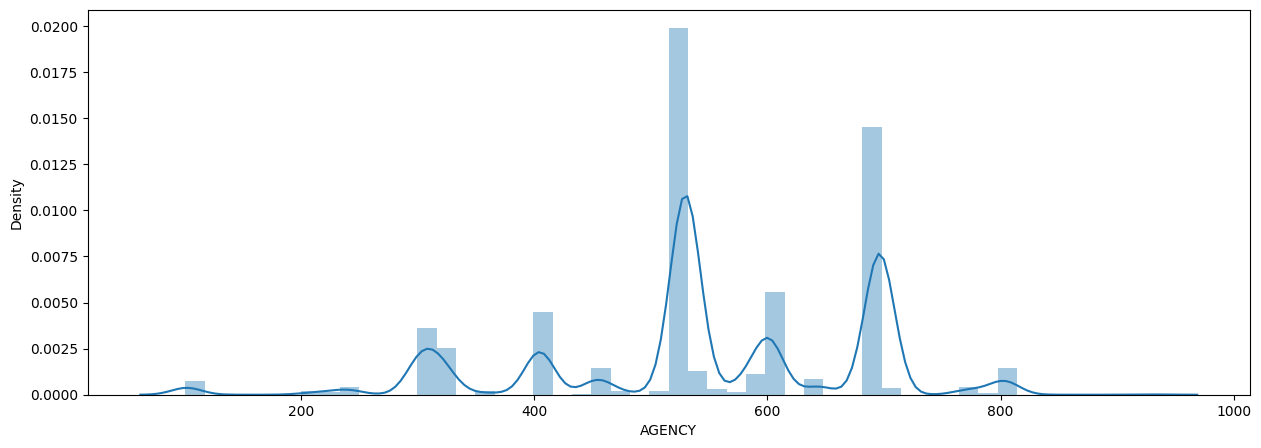

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(data.AGENCY)

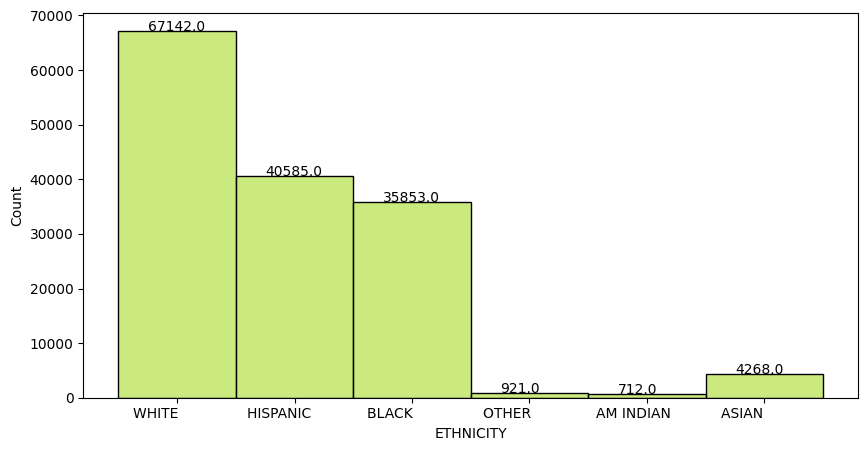

In [ ]:
plt.figure(figsize=(10,5))
a = sns.histplot(data.ETHNICITY,color='#B9E455')
for p in a.patches:
   a.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

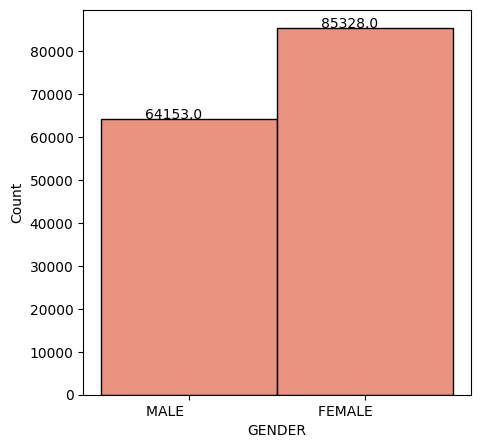

In [ ]:
plt.figure(figsize=(5,5))
abd = sns.histplot(data['GENDER'],color='#E46E55')
for p in abd.patches:
   abd.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

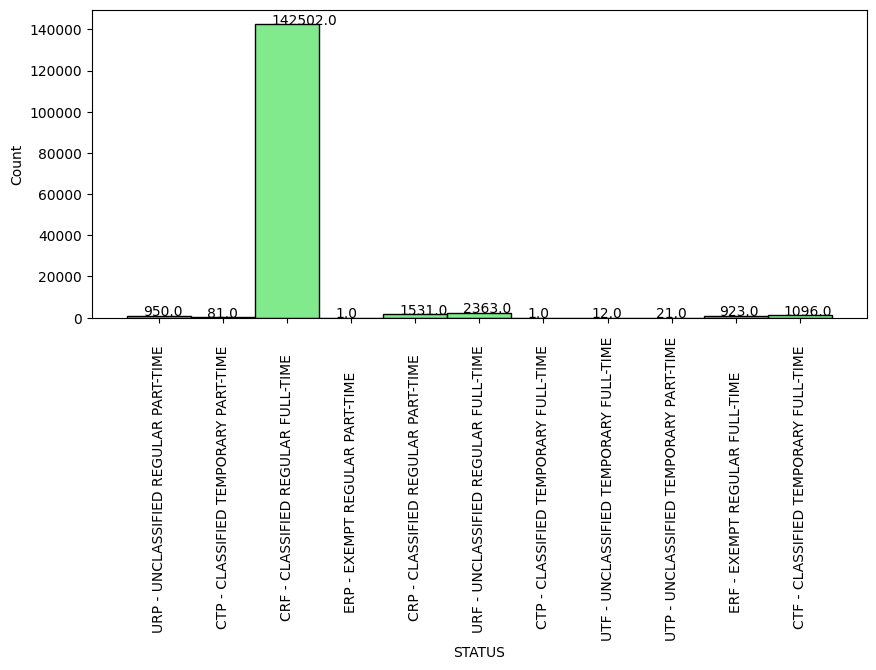

In [ ]:
plt.figure(figsize=(10,4))
lmn = sns.histplot(data['STATUS'],color='#55E466')
plt.xticks(rotation=90)
for p in lmn.patches:
   lmn.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

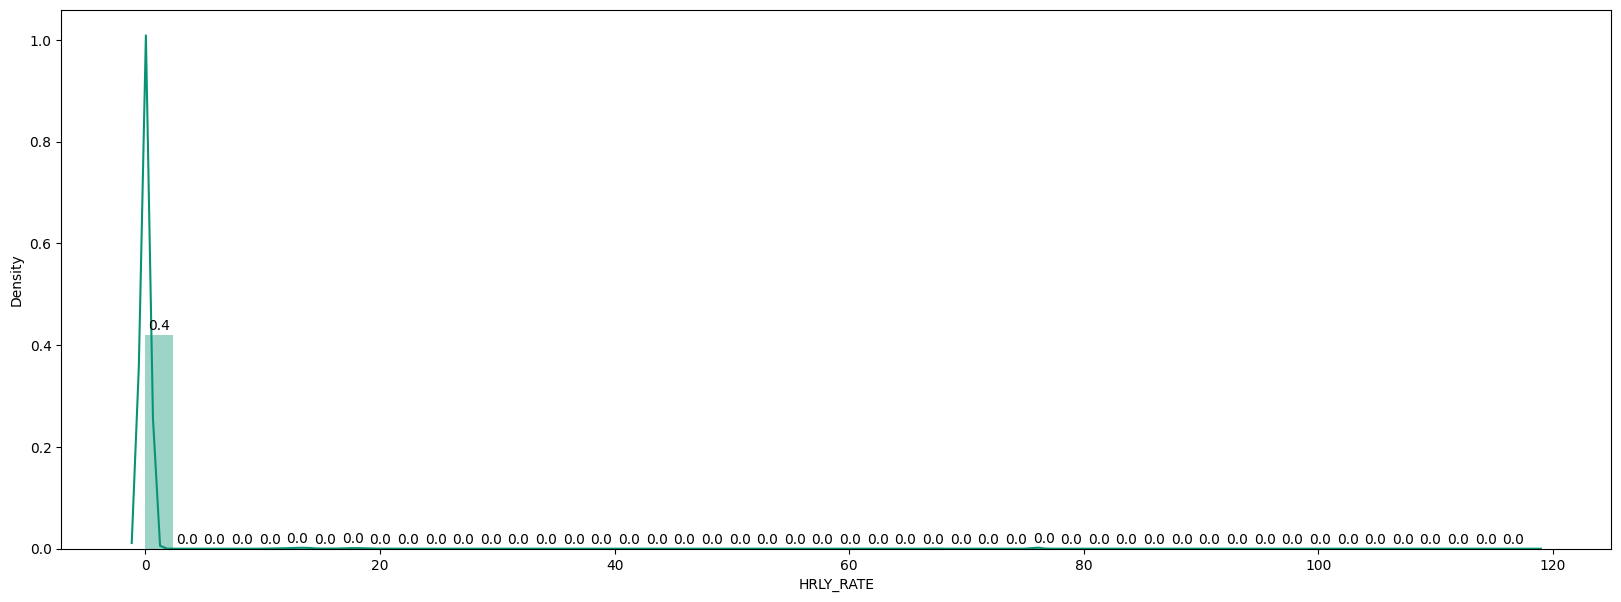

In [ ]:
plt.figure(figsize=(20,7))
acd = sns.distplot(data['HRLY_RATE'],color='#089474')
for p in acd.patches:
   acd.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

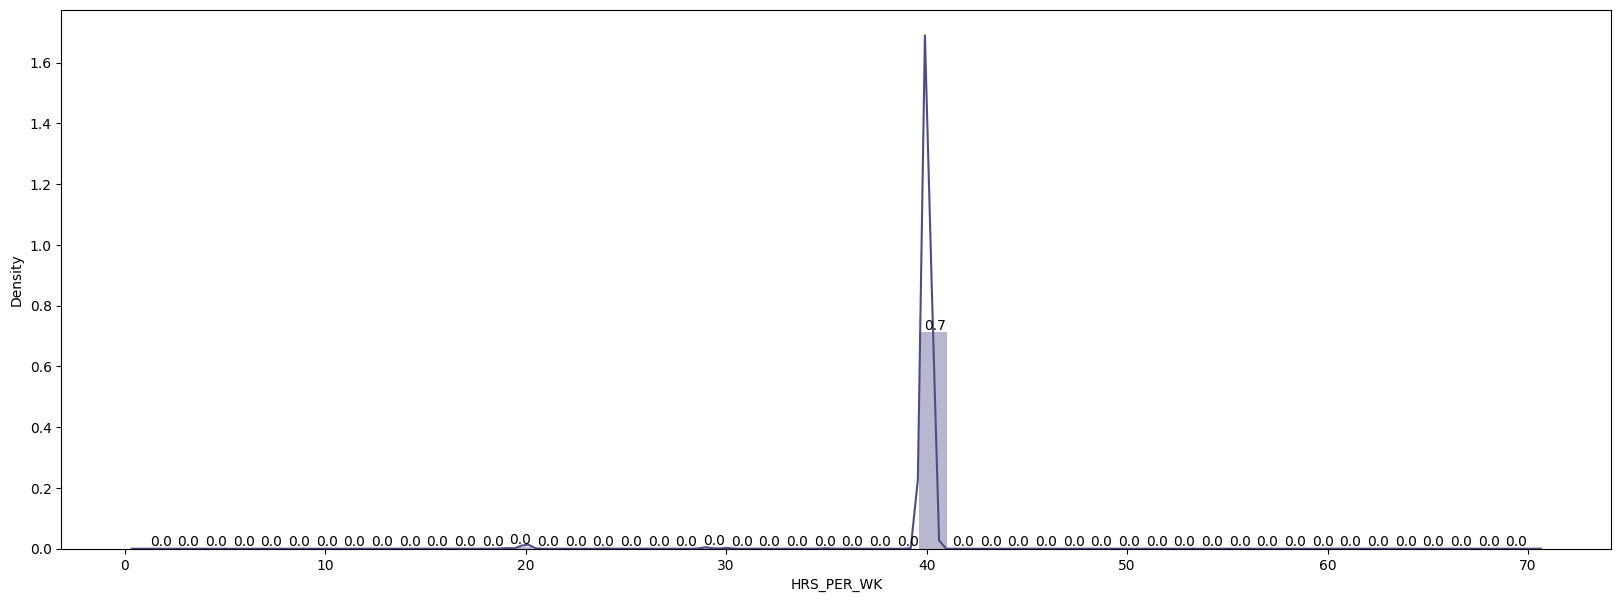

In [ ]:
plt.figure(figsize=(20,7))
efg = sns.distplot(data['HRS_PER_WK'],color='#4B4D89')
for p in efg.patches:
   efg.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

## Insights -
*   There is no much variations in AGENCY_NAME AND CLASS_TITLE(no proper distribution).

*   More employees belongs to WHITE people.

*   More employees are FEMALE individuals.

*   Status and HRS_PER_WEEK is having normal distribution.

*   HRLY_RATE and MONTHLY is having left skewed distribution.

*   The majority of an employee is less than 10000 dollars per month.

*   The majority of employees works in CLASSIFIED_REGULAR_FULL_TIME.

*   The majority of employee working in HEALTH AND HUMAN SERVICES COMMISSION that is about 36667 and TEXAS DEPARTMENT OF CRIMINAL JUSTICE is being in second place having 35926.

*   The majority no. of employees earn on a range of 0-8 dollars per hour.

*   The majority no.of employees work on an avearge of 40 hours per week.

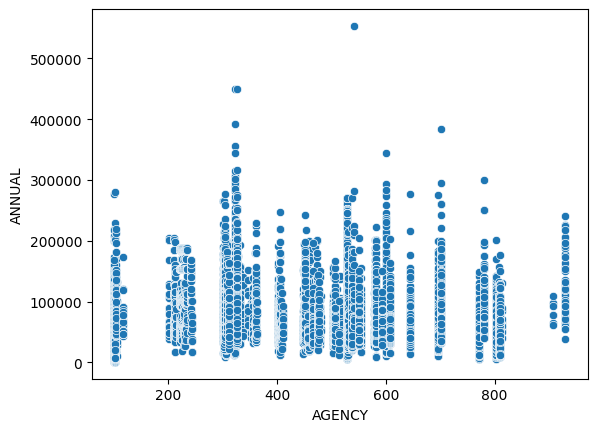

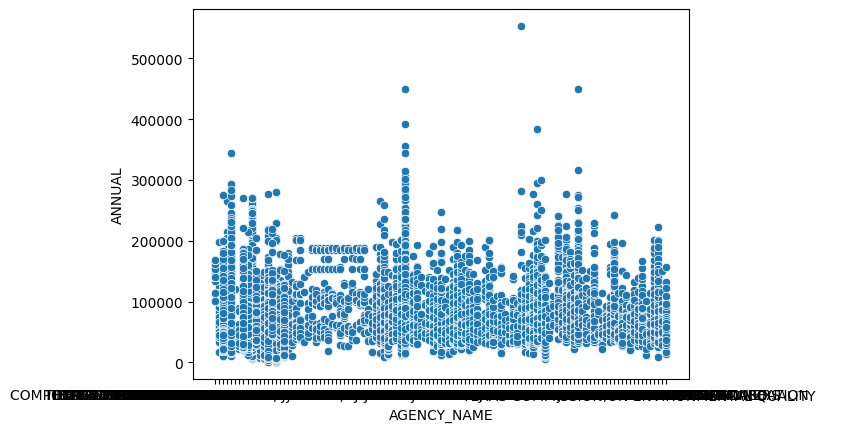

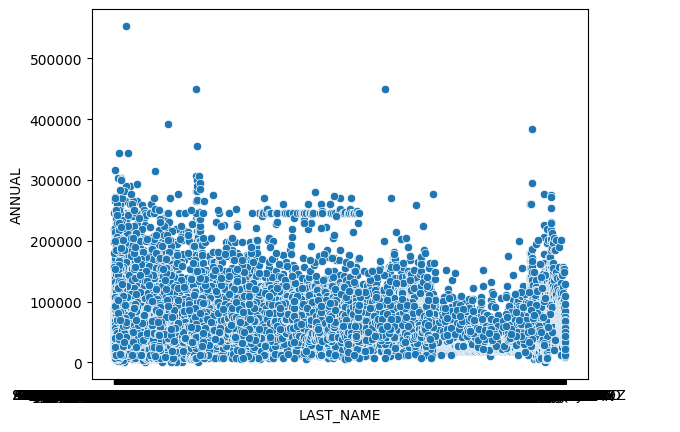

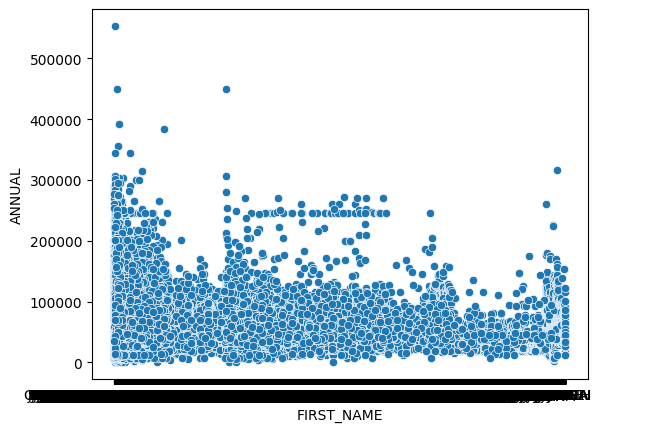

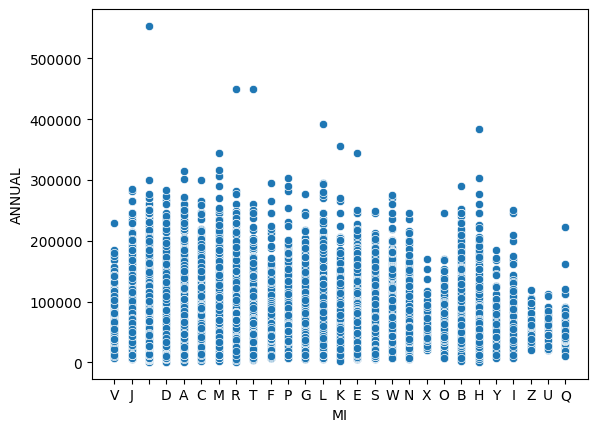

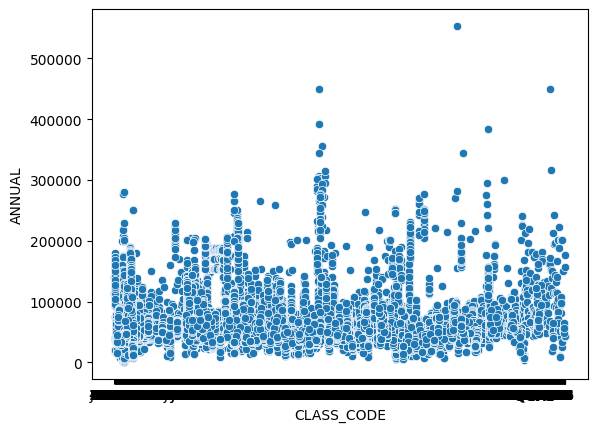

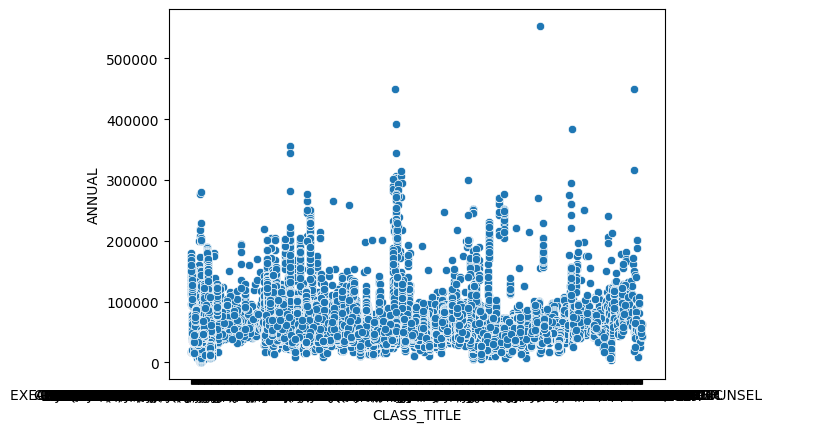

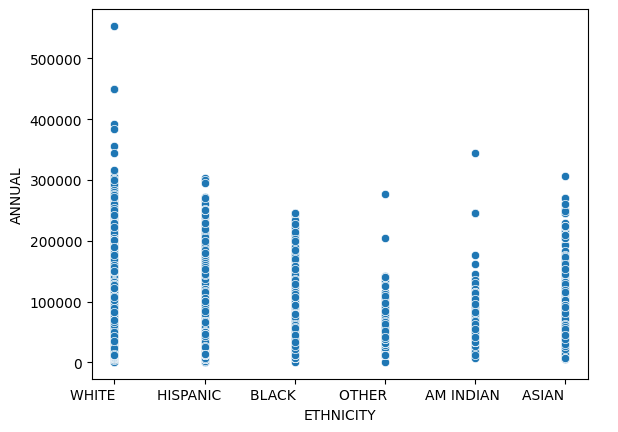

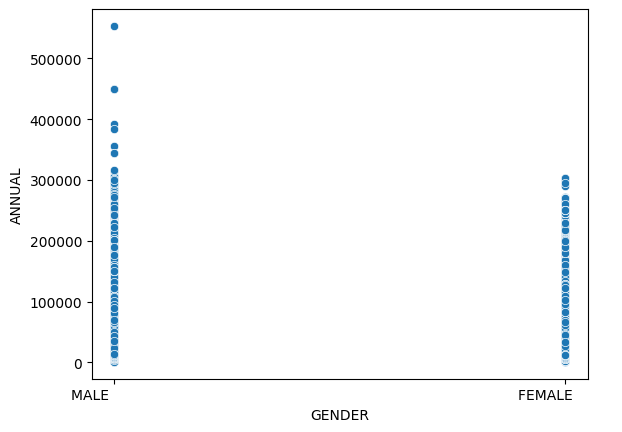

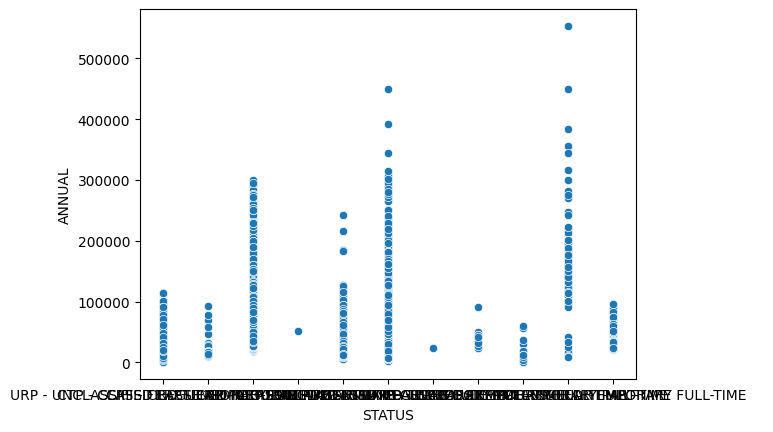

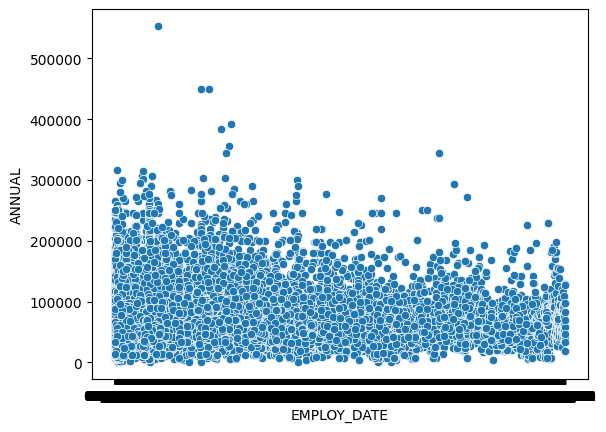

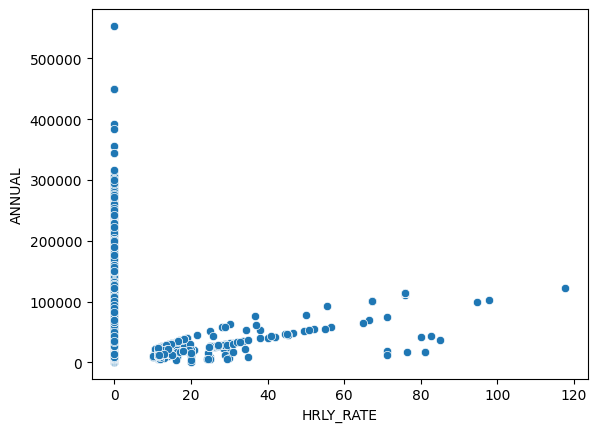

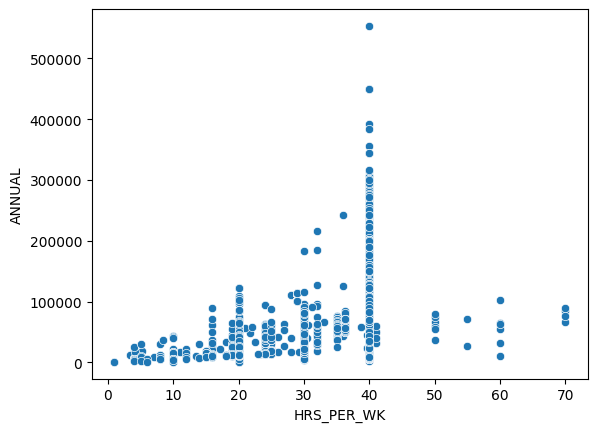

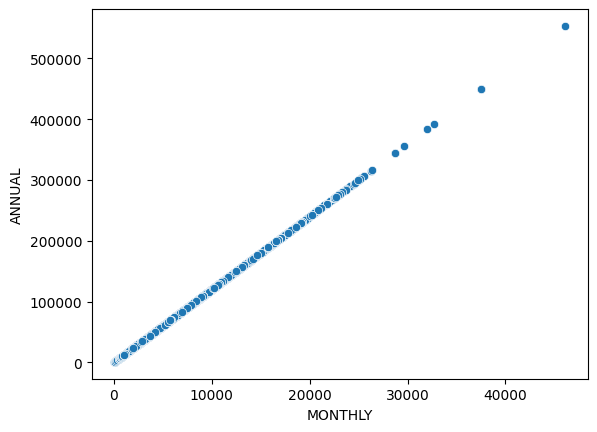

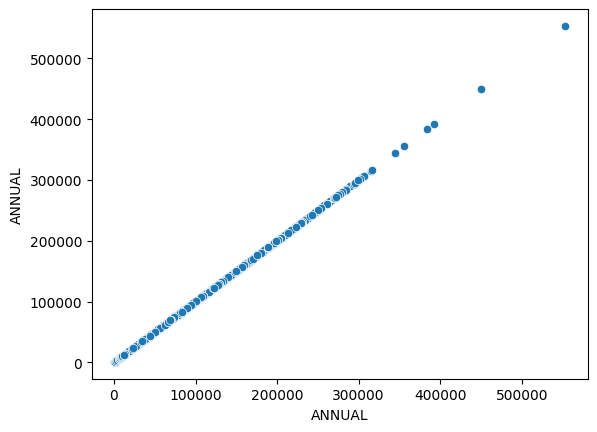

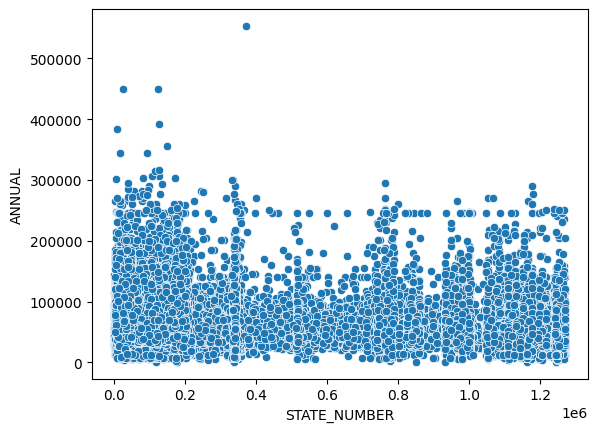

In [ ]:
for columns in data:
  sns.scatterplot(x=columns,y=data.ANNUAL,data=data)
  plt.show()

## Insights -
*   There is no trend between AGENCY_NAME and ANNUAL.

*   There is no trend between CLASS_TITLE and ANNUAL.

*   The Agencies are paying less than 200000$ to their majority of employees per year.

*   The Chief Scientific Officer is getting highest salary that is about 553500$ per Annum.

*   In Class_title majority of designation individual getting less then 200000$.

*   Excluding WHITE peoples others are getting less than 300000$ per annum.

*   The highest salary paid to WHITE people is about 500000$ per annum.

*   Male individuals are getting more salary compared to Female individuals.

*   The maximum salaries are earned by UNCLASSIFIED REGULAR FULL-TIME and EXEMPT REGULAR FULL-TIME.

*   The people who are working 30-40 HRS_PER_WEEK are getting higher salaries compared to others.

*   HRLY_RATE and MONTHLY is having linear trend with annual.

*   The females are getting paid less than 3lakh dollars.

*   Only one employee of STATE_NUMBER(372291) has salary of above 5lakh dollars and majority of them have salary less tham 3lakh dollars annually.

# Data Preprocessing

In [ ]:
data.head()

,AGENCY,AGENCY_NAME,LAST_NAME,FIRST_NAME,MI,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,EMPLOY_DATE,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL,STATE_NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030


In [ ]:
#Since below parameters not contributing for the prediction of the salary
data.drop('AGENCY_NAME',inplace=True,axis=1)
data.drop('LAST_NAME',inplace=True,axis=1)
data.drop('FIRST_NAME',inplace=True,axis=1)
data.drop('MI',inplace=True,axis=1)
data.drop('STATE_NUMBER',inplace=True,axis=1)
data.drop('EMPLOY_DATE',inplace=True,axis=1)

In [ ]:
data.head()

,AGENCY,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL
0,241,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84
1,212,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04454,4.0,1404.77,16857.24
2,241,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,75.96150,29.0,9545.82,114549.84
3,212,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,81.04453,4.0,1404.77,16857.24
4,696,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,0.00000,40.0,3284.27,39411.24


In [ ]:
#Converting Categorical data in Numerical
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data.CLASS_CODE = enc.fit_transform(data.CLASS_CODE)
data.CLASS_TITLE = enc.fit_transform(data.CLASS_TITLE)
data.ETHNICITY = enc.fit_transform(data.ETHNICITY)
data.GENDER = enc.fit_transform(data.GENDER)
data.STATUS = enc.fit_transform(data.STATUS)

data.head()

,AGENCY,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,STATUS,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL
0,241,1409,711,5,1,8,75.96150,29.0,9545.82,114549.84
1,212,616,560,5,1,4,81.04454,4.0,1404.77,16857.24
2,241,1409,711,5,1,8,75.96150,29.0,9545.82,114549.84
3,212,616,560,5,1,4,81.04453,4.0,1404.77,16857.24
4,696,810,292,3,0,0,0.00000,40.0,3284.27,39411.24


# Feature Selection

<Axes: >

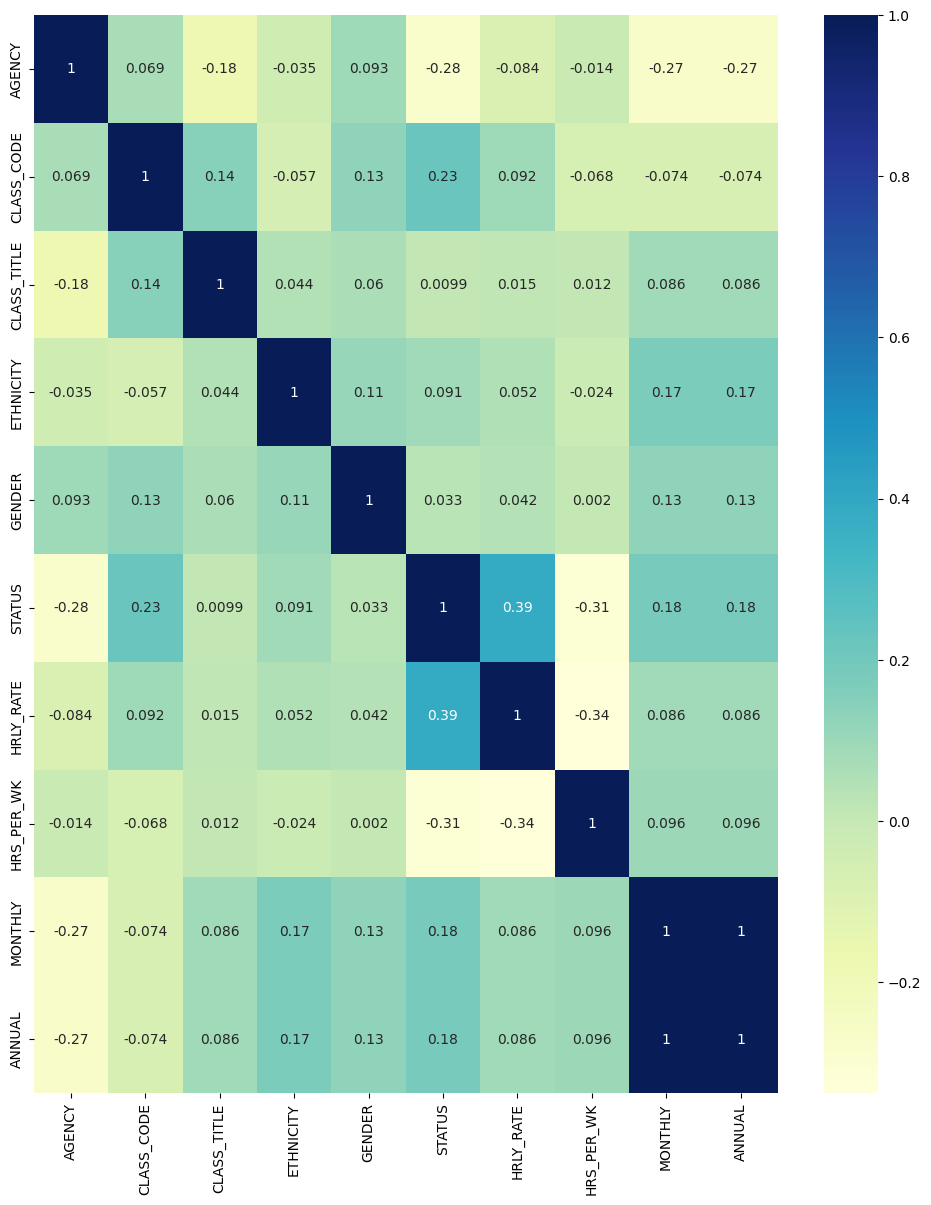

In [ ]:
corrmatrix=data.corr()
plt.figure(figsize=(12,14))
sns.heatmap(corrmatrix,linecolor='blue',cmap="YlGnBu",annot=True)

In [ ]:
#Pearson Correlation
from scipy.stats import pearsonr
from termcolor import colored

In [ ]:
# Pearson correlation of STATUS
print(colored('STATUS:','blue',attrs=['bold']))
list1 = data ['STATUS']
list2 = data ['AGENCY']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation of AGENCY: %.3f' % corr)

list2 = data ['CLASS_CODE']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation of CLASS_CODE: %.3f' % corr)

list2 = data ['CLASS_TITLE']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation of CLASS_TITLE: %.3f' % corr)

list2 = data ['ETHNICITY']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation of ETHNICITY: %.3f' % corr)

list2 = data ['GENDER']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation of GENDER: %.3f' % corr)

list2 = data ['HRLY_RATE']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation of HRLY_RATE: %.3f' % corr)

list2 = data ['HRS_PER_WK']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation of HRS_PER_WK: %.3f' % corr)

list2 = data ['MONTHLY']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation of MONTHLY: %.3f' % corr)

list2 = data ['ANNUAL']
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation of ANNUAL: %.3f' % corr)

STATUS:
Pearsons correlation of AGENCY: -0.277
Pearsons correlation of CLASS_CODE: 0.225
Pearsons correlation of CLASS_TITLE: 0.010
Pearsons correlation of ETHNICITY: 0.091
Pearsons correlation of GENDER: 0.033
Pearsons correlation of HRLY_RATE: 0.388
Pearsons correlation of HRS_PER_WK: -0.307
Pearsons correlation of MONTHLY: 0.184
Pearsons correlation of ANNUAL: 0.184


# Model Creation

In [ ]:
#Creating independent and dependent variable
x = data[['AGENCY','CLASS_CODE','CLASS_TITLE','ETHNICITY','GENDER','HRLY_RATE','HRS_PER_WK','MONTHLY','ANNUAL']]
y = data.STATUS

In [ ]:
x

,AGENCY,CLASS_CODE,CLASS_TITLE,ETHNICITY,GENDER,HRLY_RATE,HRS_PER_WK,MONTHLY,ANNUAL
0,241,1409,711,5,1,75.96150,29.0,9545.82,114549.84
1,212,616,560,5,1,81.04454,4.0,1404.77,16857.24
2,241,1409,711,5,1,75.96150,29.0,9545.82,114549.84
3,212,616,560,5,1,81.04453,4.0,1404.77,16857.24
4,696,810,292,3,0,0.00000,40.0,3284.27,39411.24
...,...,...,...,...,...,...,...,...,...
149476,809,1042,1198,5,1,0.00000,40.0,2899.00,34788.00
149477,809,84,1404,5,0,0.00000,40.0,5500.00,66000.00
149478,809,4,324,5,1,12.93000,20.0,1120.60,13447.20
149479,809,278,1007,5,1,0.00000,40.0,5744.16,68929.92


In [ ]:
y

0         8
1         4
2         8
3         4
4         0
         ..
149476    0
149477    0
149478    1
149479    0
149480    1
Name: STATUS, Length: 149481, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape

(119584, 9)

<Axes: ylabel='Density'>

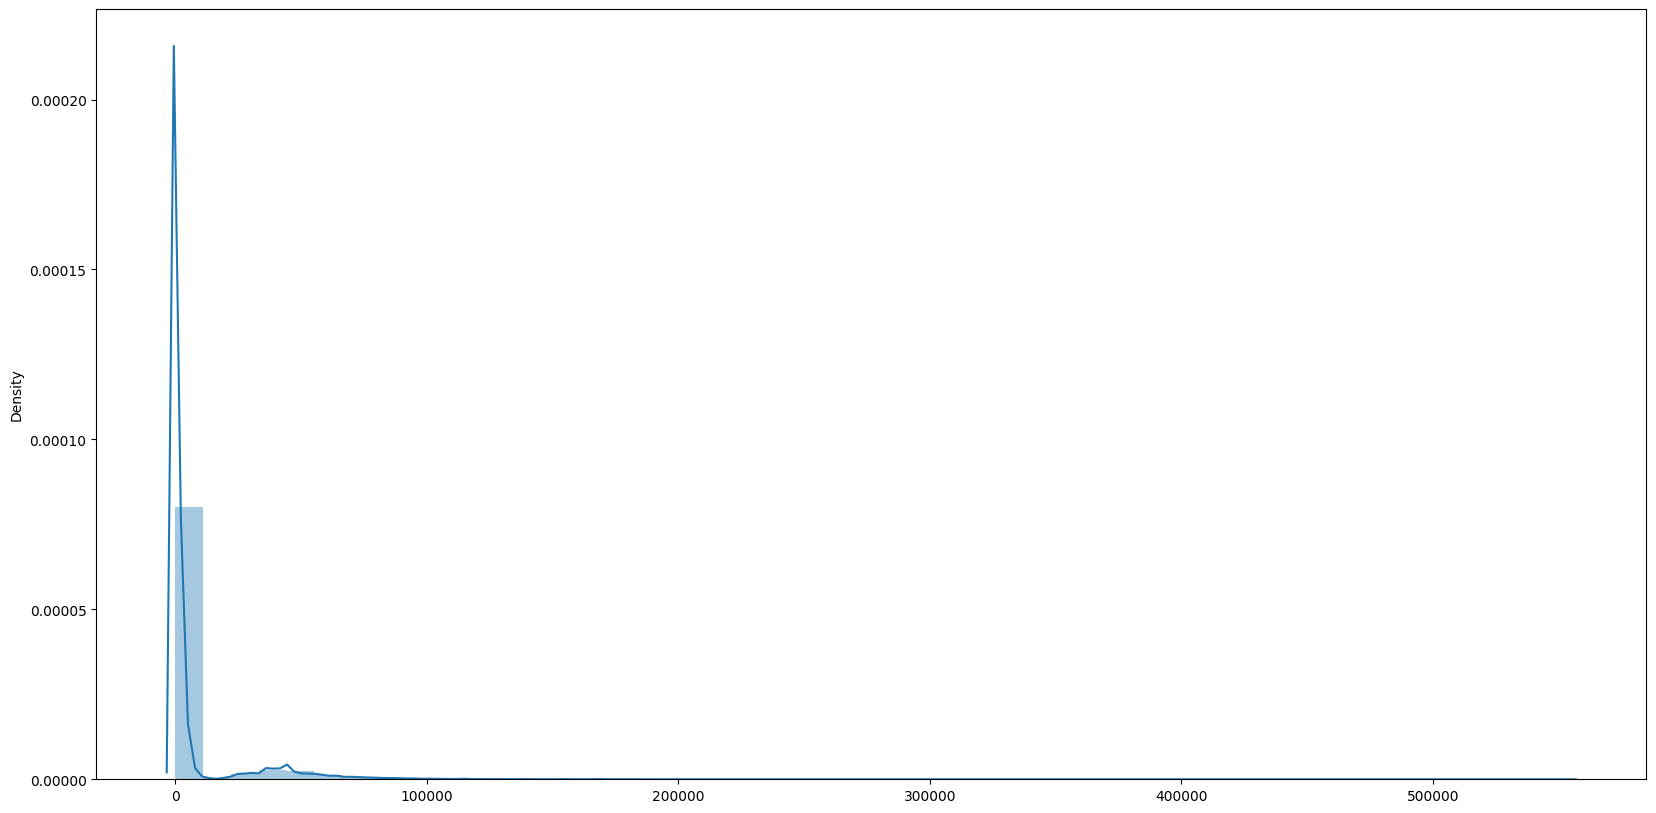

In [ ]:
plt.figure(figsize = (20,10))
sns.distplot(x_train)

In [ ]:
x_test.shape

(29897, 9)

<Axes: ylabel='Density'>

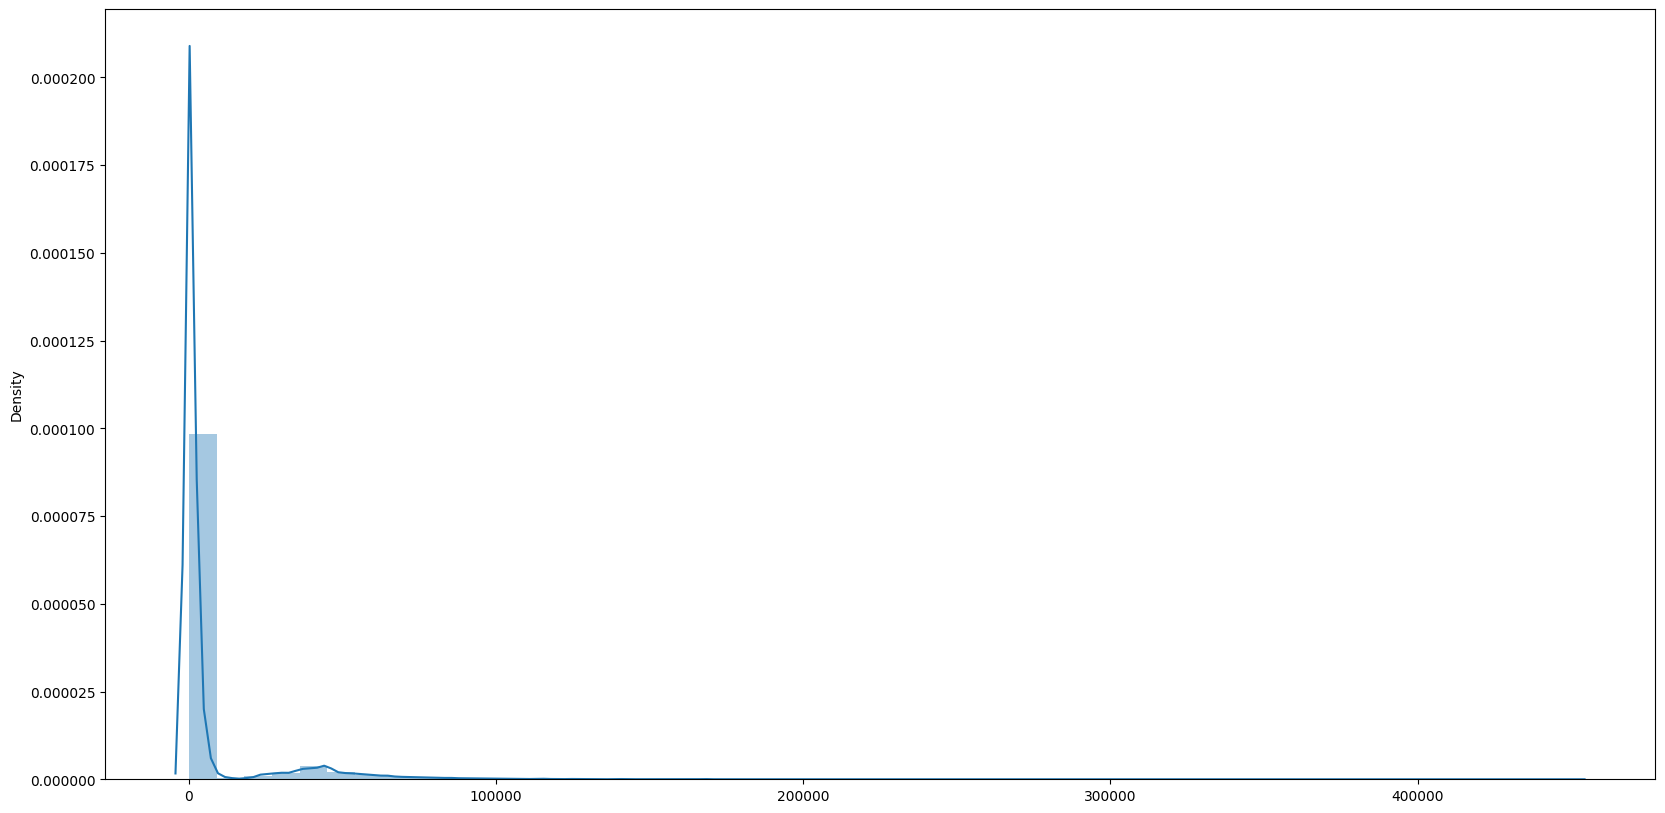

In [ ]:
plt.figure(figsize = (20,10))
sns.distplot(x_test)

In [ ]:
y_train.shape

(119584,)

<Axes: xlabel='STATUS', ylabel='Density'>

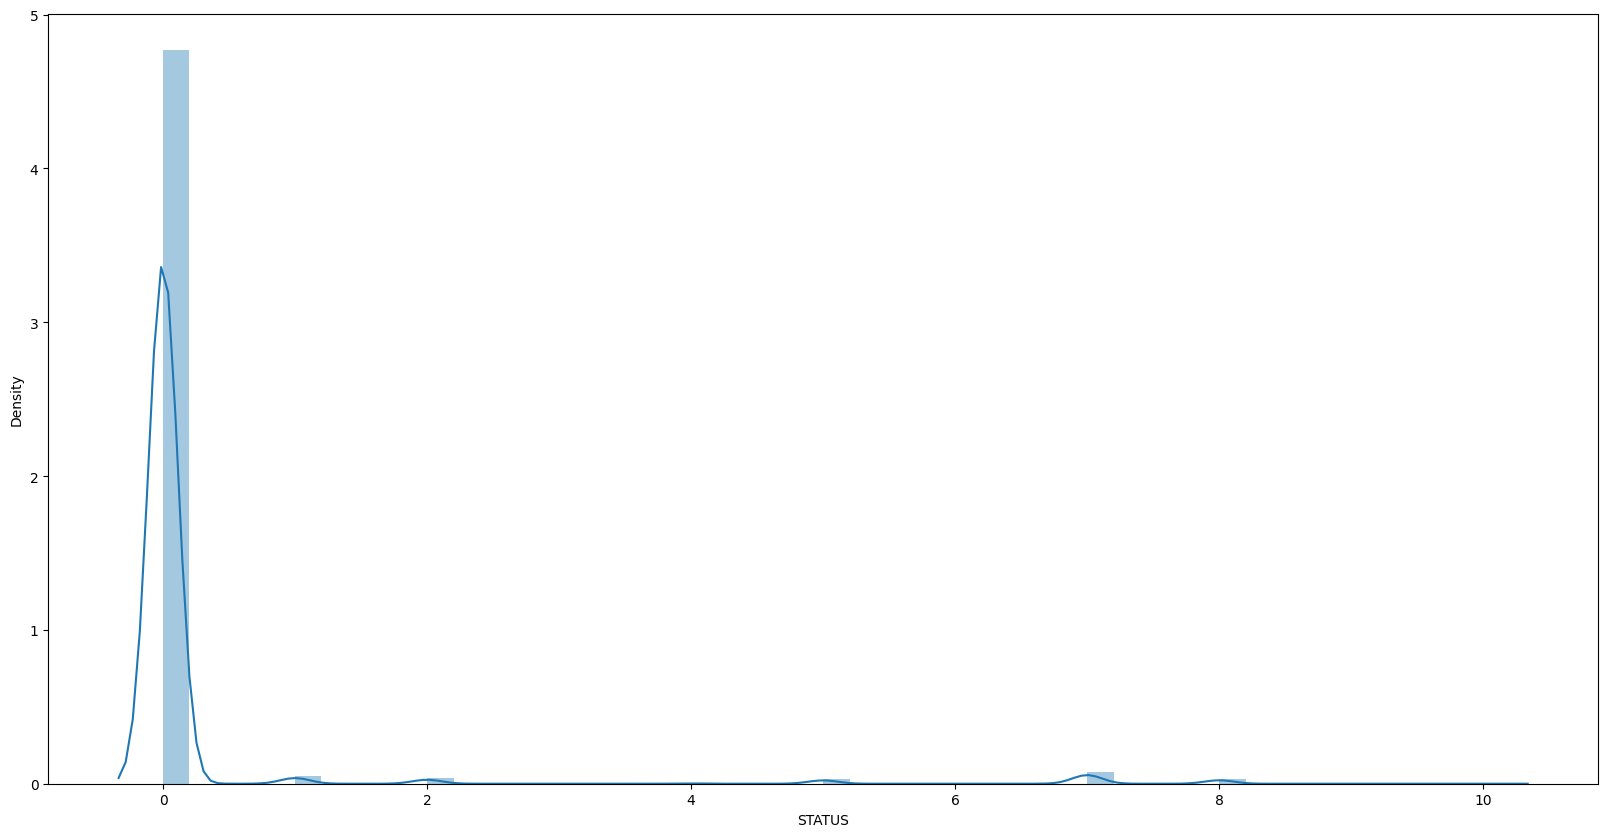

In [ ]:
plt.figure(figsize = (20,10))
sns.distplot(y_train)

In [ ]:
y_test.shape

(29897,)

<Axes: xlabel='STATUS', ylabel='Density'>

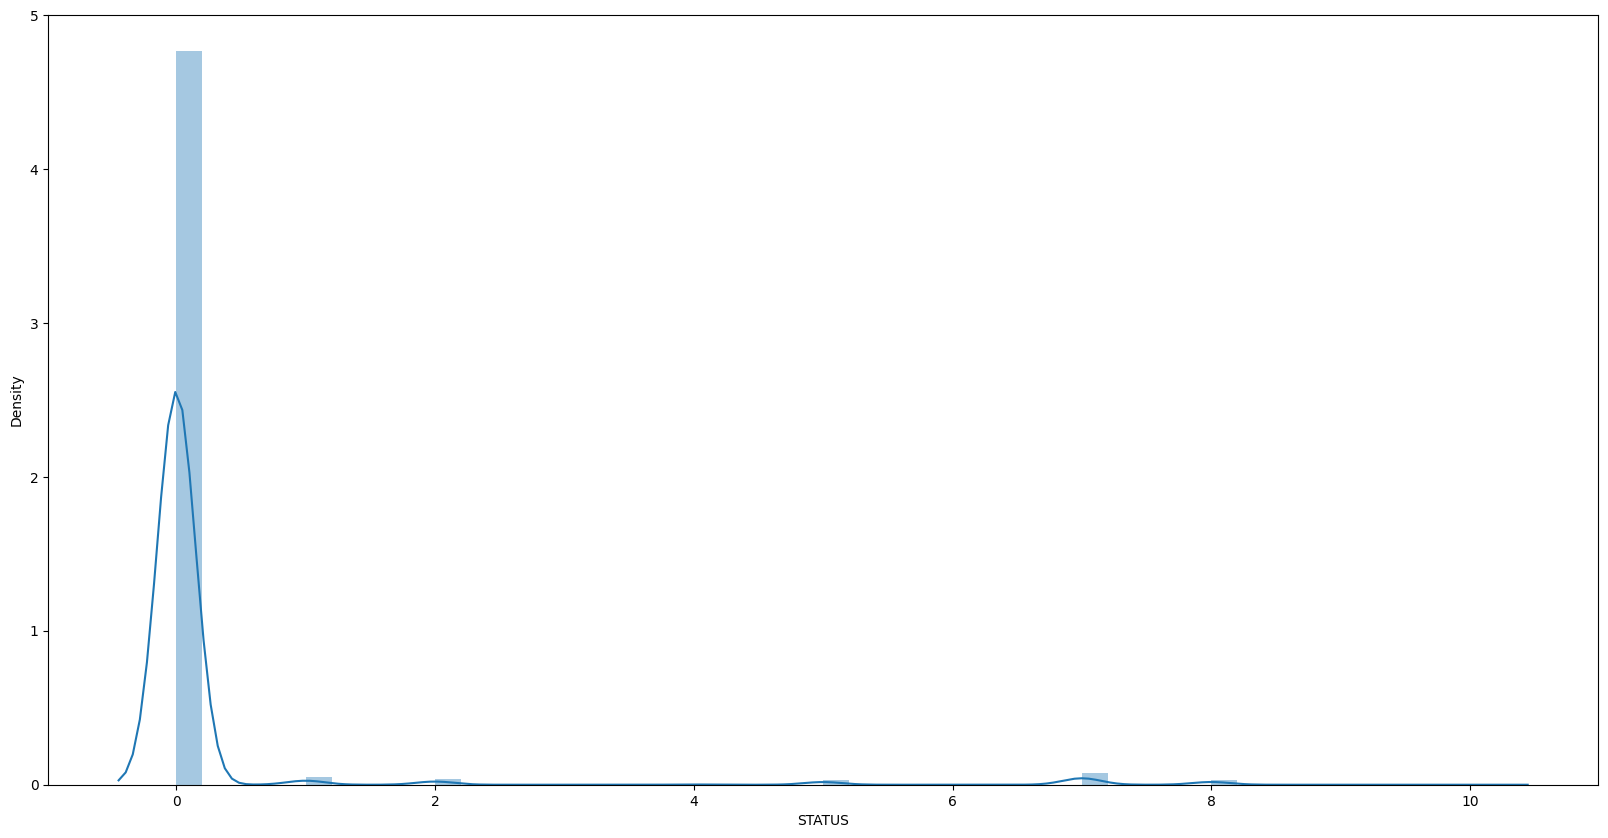

In [ ]:
plt.figure(figsize = (20,10))
sns.distplot(y_test)

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
X_train

array([[-0.11225939,  0.65103865, -1.00081637, ...,  0.12253979,
         0.39578842,  0.39578842],
       [-0.63018597, -1.26077071,  1.7147016 , ...,  0.12253979,
        -0.82658199, -0.82658199],
       [ 1.08184912,  0.518825  ,  0.75511966, ...,  0.12253979,
         0.08671196,  0.08671196],
       ...,
       [ 0.39847377, -0.54681701, -0.39984108, ...,  0.12253979,
        -0.63445687, -0.63445687],
       [ 1.08184912,  0.60344174, -1.35694987, ...,  0.12253979,
        -0.407376  , -0.407376  ],
       [-0.11945281,  0.75680957, -0.57048838, ...,  0.12253979,
        -0.91534675, -0.91534675]])

In [ ]:
X_test

array([[ 0.39847377, -1.1444227 , -1.14425903, ...,  0.12253979,
         0.48975325,  0.48975325],
       [ 1.08184912, -1.30572335, -1.50286568, ...,  0.12253979,
        -0.71280236, -0.71280236],
       [ 1.08184912,  0.46858382,  1.50201076, ...,  0.12253979,
        -0.15315621, -0.15315621],
       ...,
       [-0.11945281,  0.78589658,  1.06179018, ...,  0.12253979,
        -1.08277752, -1.08277752],
       [ 0.03880253, -0.90114959,  0.57705291, ...,  0.12253979,
         1.57392236,  1.57392236],
       [-0.11945281, -1.6732773 , -0.96371913, ...,  0.12253979,
        -0.94701121, -0.94701121]])

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
y_pred1 = LR.predict(X_test)

In [ ]:
#importing metrics for checking score
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix

In [ ]:
# Accuracy
acc_LR = accuracy_score(y_test,y_pred1)
acc_LR

0.9875907281667057

In [ ]:
f1_LR = f1_score(y_test,y_pred1,average='weighted')
f1_LR

0.9856600904521721

In [ ]:
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred1))

Confusion_matrix :
[[28482     0    13     0     2     0     0     0     0]
 [    1   288     0     1     0     0     1     0     0]
 [   81     0   148     0     0     0     0     0     0]
 [    0    17     0     0     0     0     0     0     0]
 [    7     0     0     0   183     3     0     0     0]
 [  218     0     1     0    20   229     0     0     0]
 [    0     1     0     0     0     0   196     0     0]
 [    0     0     0     0     0     2     0     0     0]
 [    0     0     0     0     0     0     3     0     0]]


In [ ]:
print("Classification_report :")
print(classification_report(y_test, y_pred1))

Classification_report :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     28497
           1       0.94      0.99      0.96       291
           2       0.91      0.65      0.76       229
           4       0.00      0.00      0.00        17
           5       0.89      0.95      0.92       193
           7       0.98      0.49      0.65       468
           8       0.98      0.99      0.99       197
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         3

    accuracy                           0.99     29897
   macro avg       0.63      0.56      0.59     29897
weighted avg       0.99      0.99      0.99     29897



In [ ]:
#checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR,x,y,cv=3,scoring='accuracy')
print(scores)
print('Cross Validation Score:',scores.mean())
print('Std:',scores.std())
#std of < 0.05 is good

[0.9529773  0.96748751 0.96297188]
Cross Validation Score: 0.9611455636502297
Std: 0.006062897851129304


## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train, y_train)
y_pred2 = KNN.predict(X_test)

In [ ]:
acc_KNN = accuracy_score(y_test,y_pred2)
acc_KNN

0.9945813961267017

In [ ]:
f1_KNN = f1_score(y_test,y_pred1,average='weighted')
f1_KNN

0.9856600904521721

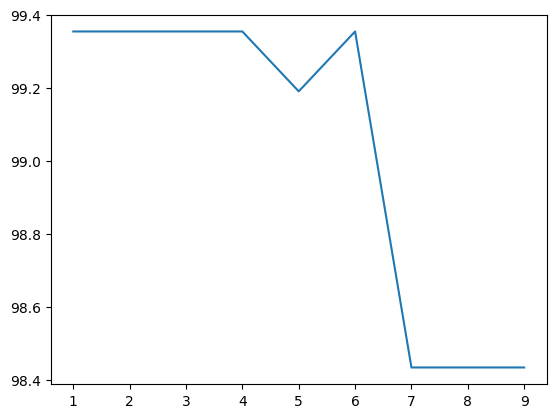

In [ ]:
ERROR_RATE = []
for i in range(1,10):
  KNN = KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train,y_train)
  y_pred = KNN.predict(x_test)
  error_rate= (y_test != y_pred).sum()/len(y_test)*100
  ERROR_RATE.append(error_rate)
plt.plot(range(1,10),ERROR_RATE)

## **SVM**

In [ ]:
from sklearn.svm import SVC

SVM = SVC(random_state=0)
SVM.fit(X_train, y_train)
y_pred3 = SVM.predict(X_test)

In [ ]:
# Accuracy
acc_SVM = accuracy_score(y_test,y_pred3)
acc_SVM

0.9945479479546443

In [ ]:
f1_SVM = f1_score(y_test,y_pred3,average="weighted") # checking f1 score
f1_SVM

0.9940210099584945

In [ ]:
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred3))

Confusion_matrix :
[[28490     0     3     0     0     4     0     0     0]
 [    1   288     0     0     0     0     2     0     0]
 [   75     0   154     0     0     0     0     0     0]
 [    0    15     0     1     0     0     1     0     0]
 [    6     0     0     0   183     4     0     0     0]
 [   39     0     0     0     7   422     0     0     0]
 [    0     0     0     0     0     0   194     0     3]
 [    0     0     0     0     0     2     0     0     0]
 [    0     0     0     0     0     0     1     0     2]]


In [ ]:
print("Classification_report :")
print(classification_report(y_test, y_pred3))

Classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28497
           1       0.95      0.99      0.97       291
           2       0.98      0.67      0.80       229
           4       1.00      0.06      0.11        17
           5       0.96      0.95      0.96       193
           7       0.98      0.90      0.94       468
           8       0.98      0.98      0.98       197
           9       0.00      0.00      0.00         2
          10       0.40      0.67      0.50         3

    accuracy                           0.99     29897
   macro avg       0.81      0.69      0.69     29897
weighted avg       0.99      0.99      0.99     29897



## **Naive Bayes Bernoulli**

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred4 = NB.predict(X_test)

In [ ]:
# Accuracy
acc_NB = accuracy_score(y_test,y_pred4)
acc_NB

0.9709669866541794

In [ ]:
f1_NB = f1_score(y_test,y_pred4,average="weighted") # checking f1 score
f1_NB

0.9697050960842849

In [ ]:
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred4))

Confusion_matrix :
[[28283     0    15     0    58   141     0     0     0]
 [    0   273     0    12     0     3     2     0     1]
 [   72     0   157     0     0     0     0     0     0]
 [    0    11     0     5     0     0     1     0     0]
 [    3     0     0     0   190     0     0     0     0]
 [  191     0     1     0    51     6     3   216     0]
 [    0    53     0     0     0    18   110     0    16]
 [    0     0     0     0     0     0     0     2     0]
 [    0     0     0     0     0     0     0     0     3]]


In [ ]:
print("Classification_report :")
print(classification_report(y_test, y_pred4))

Classification_report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28497
           1       0.81      0.94      0.87       291
           2       0.91      0.69      0.78       229
           4       0.29      0.29      0.29        17
           5       0.64      0.98      0.77       193
           7       0.04      0.01      0.02       468
           8       0.95      0.56      0.70       197
           9       0.01      1.00      0.02         2
          10       0.15      1.00      0.26         3

    accuracy                           0.97     29897
   macro avg       0.53      0.72      0.52     29897
weighted avg       0.97      0.97      0.97     29897



## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, y_train)
y_pred5 = DT.predict(X_test)

In [ ]:
# Accuracy
acc_DT = accuracy_score(y_test,y_pred5)
acc_DT

0.9973241462354082

In [ ]:
f1_DT = f1_score(y_test,y_pred5,average="weighted") # checking f1 score
f1_DT

0.997276952537042

In [ ]:
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred5))

Confusion_matrix :
[[28473     0    24     0     0     0     0     0     0     0]
 [    0   285     0     6     0     0     0     0     0     0]
 [   39     0   190     0     0     0     0     0     0     0]
 [    0     5     0    12     0     0     0     0     0     0]
 [    0     0     0     0   192     0     1     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0   468     0     0     0]
 [    0     0     0     0     0     1     0   195     0     1]
 [    0     0     0     0     0     0     2     0     0     0]
 [    0     0     0     0     0     0     0     1     0     2]]


In [ ]:
print("Classification_report :")
print(classification_report(y_test, y_pred5))

Classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28497
           1       0.98      0.98      0.98       291
           2       0.89      0.83      0.86       229
           4       0.67      0.71      0.69        17
           5       1.00      0.99      1.00       193
           6       0.00      0.00      0.00         0
           7       0.99      1.00      1.00       468
           8       0.99      0.99      0.99       197
           9       0.00      0.00      0.00         2
          10       0.67      0.67      0.67         3

    accuracy                           1.00     29897
   macro avg       0.72      0.72      0.72     29897
weighted avg       1.00      1.00      1.00     29897



## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train)
y_pred6 = RF.predict(X_test)

In [ ]:
# Accuracy
acc_RF = accuracy_score(y_test,y_pred6)
acc_RF

0.9978927651603839

In [ ]:
f1_RF = f1_score(y_test,y_pred6,average="weighted") # checking f1 score
f1_RF

0.9977870117204903

In [ ]:
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred6))

Confusion_matrix :
[[28484     0    13     0     0     0     0     0     0]
 [    0   291     0     0     0     0     0     0     0]
 [   39     0   190     0     0     0     0     0     0]
 [    0     6     0    11     0     0     0     0     0]
 [    0     0     0     0   192     1     0     0     0]
 [    0     0     0     0     0   468     0     0     0]
 [    0     0     0     0     0     0   196     0     1]
 [    0     0     0     0     0     2     0     0     0]
 [    0     0     0     0     0     0     1     0     2]]


In [ ]:
print("Classification_report :")
print(classification_report(y_test, y_pred6))

Classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28497
           1       0.98      1.00      0.99       291
           2       0.94      0.83      0.88       229
           4       1.00      0.65      0.79        17
           5       1.00      0.99      1.00       193
           7       0.99      1.00      1.00       468
           8       0.99      0.99      0.99       197
           9       0.00      0.00      0.00         2
          10       0.67      0.67      0.67         3

    accuracy                           1.00     29897
   macro avg       0.84      0.79      0.81     29897
weighted avg       1.00      1.00      1.00     29897



## **XGboost**

In [ ]:
from xgboost import XGBClassifier

XGB = XGBClassifier(random_state=0,eval_metric='mlogloss')
XGB.fit(X_train, y_train)
y_pred7 = XGB.predict(X_test)

In [ ]:
# Accuracy
acc_XGB = accuracy_score(y_test,y_pred7)
acc_XGB

0.9978258688162692

In [ ]:
f1_XGB = f1_score(y_test,y_pred7,average="weighted") # checking f1 score
f1_XGB

0.9977290578648721

In [ ]:
print("Confusion_matrix :")
print(confusion_matrix(y_test,y_pred7))

Confusion_matrix :
[[28482     0    15     0     0     0     0     0     0]
 [    0   289     0     2     0     0     0     0     0]
 [   38     0   191     0     0     0     0     0     0]
 [    0     6     0    11     0     0     0     0     0]
 [    0     0     0     0   193     0     0     0     0]
 [    0     0     0     0     0   468     0     0     0]
 [    0     0     0     0     0     0   196     0     1]
 [    0     0     0     0     0     2     0     0     0]
 [    0     0     0     0     0     0     1     0     2]]


In [ ]:
print("Classification_report :")
print(classification_report(y_test, y_pred7))

Classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28497
           1       0.98      0.99      0.99       291
           2       0.93      0.83      0.88       229
           4       0.85      0.65      0.73        17
           5       1.00      1.00      1.00       193
           7       1.00      1.00      1.00       468
           8       0.99      0.99      0.99       197
           9       0.00      0.00      0.00         2
          10       0.67      0.67      0.67         3

    accuracy                           1.00     29897
   macro avg       0.82      0.79      0.81     29897
weighted avg       1.00      1.00      1.00     29897



## **Model Comparison Report**

In [ ]:
# creating model comparison report using DataFrame
score = pd.DataFrame({"Model":["Logistic Regression","K-Neighbors Classifier","Support Vector Classifier","Naive Bayes","DecisionTreeClassifier","RandomForestClassifier","XGboost"],
                     "Accuracy":[acc_LR*100,acc_KNN*100,acc_SVM*100,acc_NB*100,acc_DT*100,acc_RF*100,acc_XGB*100],
                     "F1_Score":[f1_LR,f1_KNN,f1_SVM,f1_NB,f1_DT,f1_RF,f1_XGB]})

In [ ]:
score

,Model,Accuracy,F1_Score
0,Logistic Regression,98.759073,0.985660
1,K-Neighbors Classifier,99.458140,0.985660
2,Support Vector Classifier,99.454795,0.994021
3,Naive Bayes,97.096699,0.969705
4,DecisionTreeClassifier,99.732415,0.997277
5,RandomForestClassifier,99.789277,0.997787
6,XGboost,99.782587,0.997729


### **Task 3 -**
#### **1. Who are the outliers in the salaries?**

DataFrame data contains the outliers of salaries.

In [ ]:
# Reading data again.
data = pd.read_csv('/content/drive/MyDrive/Rubixe Projects/Texas Employee Salary Prediction Project/salary.csv')

<Axes: xlabel='ANNUAL'>

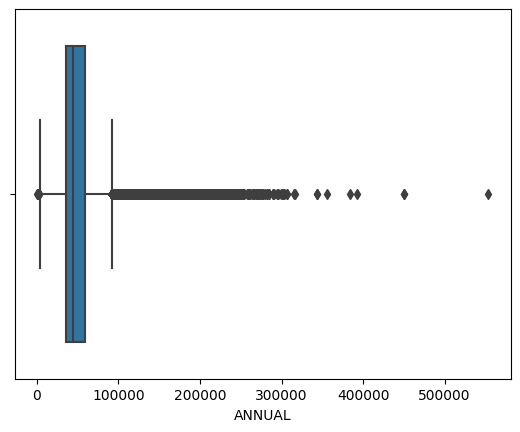

In [ ]:
sns.boxplot(x ='ANNUAL',data = data)

In [ ]:
from scipy import stats

IQR = stats.iqr(data.ANNUAL,interpolation='midpoint')
IQR

22151.64

In [ ]:
Q1 = data.ANNUAL.quantile(0.25)
Q3 = data.ANNUAL.quantile(0.75)
print(Q1)
Q3

36238.08


58389.72

In [ ]:
low_limit = Q1 - 1.5*IQR
upp_limit = Q3 + 1.5*IQR
print('low_limit',low_limit)
print('upp_limit',upp_limit)

low_limit 3010.6200000000026
upp_limit 91617.18


In [ ]:
lower = data.loc[data['ANNUAL']<low_limit]
lower

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
141394,101,SENATE ...,EDMONDSON,DOUGLAS,,7103,LEG. SERVICE/MAINTENANCE ...,WHITE,MALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,02/03/05,20.0,1.0,86.66,1039.92,176291,NaN,NaN,NaN,NaN,NaN
141415,101,SENATE ...,FONTENOT,RACHEAL,D,7103,LEG. SERVICE/MAINTENANCE ...,OTHER,FEMALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,12/04/19,20.0,1.0,86.66,1039.92,1246122,NaN,NaN,NaN,NaN,NaN
141808,102,HOUSE OF REPRESENTATIVES ...,BERNAL,JESUS,R,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,04/12/17,0.0,10.0,100.00,1200.00,118315,NaN,NaN,NaN,NaN,NaN
141809,102,HOUSE OF REPRESENTATIVES ...,BHALLA,RACHEL,C,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/08/19,0.0,10.0,200.00,2400.00,1164537,NaN,NaN,NaN,NaN,NaN
141897,102,HOUSE OF REPRESENTATIVES ...,CRUZ JR,PHILLIP,,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,12/01/17,0.0,20.0,100.00,1200.00,338420,NaN,NaN,NaN,NaN,NaN
141901,102,HOUSE OF REPRESENTATIVES ...,CUTBIRTH,JOE,H,7110,ELECTED OFFICIALS STAFF ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,11/01/18,0.0,20.0,100.00,1200.00,931560,NaN,NaN,NaN,NaN,NaN
142033,102,HOUSE OF REPRESENTATIVES ...,HARRIS,KATHARINE,T,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/13/20,0.0,20.0,250.00,3000.00,1247654,NaN,NaN,NaN,NaN,NaN
142067,102,HOUSE OF REPRESENTATIVES ...,HOUSTON,DONTE,D,7110,ELECTED OFFICIALS STAFF ...,BLACK,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,05/01/20,0.0,10.0,50.00,600.00,851628,NaN,NaN,NaN,NaN,NaN
142114,102,HOUSE OF REPRESENTATIVES ...,KOENIG,REID,A,7110,ELECTED OFFICIALS STAFF ...,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/23/15,0.0,20.0,100.00,1200.00,336571,NaN,NaN,NaN,NaN,NaN
142205,102,HOUSE OF REPRESENTATIVES ...,MITCHELL,JESSICA,B,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,05/01/14,0.0,4.0,210.12,2521.44,775718,NaN,NaN,NaN,NaN,NaN


In [ ]:
upper = data.loc[data['ANNUAL']>upp_limit]
upper

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.9615,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.9615,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
5,302,OFFICE OF THE ATTORNEY GENERAL ...,ROGERS,SHAUNA,,1623,DIRECTOR IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,04/01/20,0.0000,40.0,12899.00,154788.00,1177785,True,1.0,NaN,NaN,NaN
7,510,TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL ...,SPINKS,DARREL,D,1623,DIRECTOR IV ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/01/20,0.0000,40.0,10000.00,120000.00,147334,True,NaN,NaN,171383.40,NaN
36,101,SENATE ...,BARNETT,ANNA,P,7101,LEG. OFFICIAL/ADMINISTRATOR ...,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,07/26/10,0.0000,40.0,8000.00,96000.00,49800,True,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149374,809,STATE PRESERVATION BOARD ...,KOCH,MARGARET,M,1623,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,01/23/13,0.0000,40.0,10583.34,127000.08,336971,NaN,NaN,NaN,NaN,NaN
149393,809,STATE PRESERVATION BOARD ...,MEDINA,JOE,,1603,MGR IV ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/15/04,0.0000,40.0,8358.41,100300.92,9905,NaN,NaN,NaN,NaN,NaN
149401,809,STATE PRESERVATION BOARD ...,NUNN,CHRISTOPHER,L,1602,MGR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/12/05,0.0000,40.0,7916.67,95000.04,38235,NaN,NaN,NaN,NaN,NaN
149415,809,STATE PRESERVATION BOARD ...,PROVINE,CYNTHIA,R,1622,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,12/02/08,0.0000,40.0,10188.09,122257.08,52817,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.concat([lower,upper])
df

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
141394,101,SENATE ...,EDMONDSON,DOUGLAS,,7103,LEG. SERVICE/MAINTENANCE ...,WHITE,MALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,02/03/05,20.0,1.0,86.66,1039.92,176291,NaN,NaN,NaN,NaN,NaN
141415,101,SENATE ...,FONTENOT,RACHEAL,D,7103,LEG. SERVICE/MAINTENANCE ...,OTHER,FEMALE,UTP - UNCLASSIFIED TEMPORARY PART-TIME,12/04/19,20.0,1.0,86.66,1039.92,1246122,NaN,NaN,NaN,NaN,NaN
141808,102,HOUSE OF REPRESENTATIVES ...,BERNAL,JESUS,R,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,04/12/17,0.0,10.0,100.00,1200.00,118315,NaN,NaN,NaN,NaN,NaN
141809,102,HOUSE OF REPRESENTATIVES ...,BHALLA,RACHEL,C,7110,ELECTED OFFICIALS STAFF ...,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,01/08/19,0.0,10.0,200.00,2400.00,1164537,NaN,NaN,NaN,NaN,NaN
141897,102,HOUSE OF REPRESENTATIVES ...,CRUZ JR,PHILLIP,,7110,ELECTED OFFICIALS STAFF ...,HISPANIC,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,12/01/17,0.0,20.0,100.00,1200.00,338420,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149374,809,STATE PRESERVATION BOARD ...,KOCH,MARGARET,M,1623,DIRECTOR IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,01/23/13,0.0,40.0,10583.34,127000.08,336971,NaN,NaN,NaN,NaN,NaN
149393,809,STATE PRESERVATION BOARD ...,MEDINA,JOE,,1603,MGR IV ...,HISPANIC,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,03/15/04,0.0,40.0,8358.41,100300.92,9905,NaN,NaN,NaN,NaN,NaN
149401,809,STATE PRESERVATION BOARD ...,NUNN,CHRISTOPHER,L,1602,MGR III ...,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/12/05,0.0,40.0,7916.67,95000.04,38235,NaN,NaN,NaN,NaN,NaN
149415,809,STATE PRESERVATION BOARD ...,PROVINE,CYNTHIA,R,1622,DIRECTOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,12/02/08,0.0,40.0,10188.09,122257.08,52817,NaN,NaN,NaN,NaN,NaN


#### **2. What departments/roles have the biggest wage disparities between managers and employees?**

CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS department is paying highest salary of $553500.0 to CHIEF SCIENTIFIC OFFICER.

HOUSE OF REPRESENTATIVES department is paying lowest salary of $600.0 to ELECTED OFFICIALS STAFF.

In [ ]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [ ]:
data[['AGENCY NAME','ANNUAL']]

,AGENCY NAME,ANNUAL
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",114549.84
1,OFFICE OF COURT ADMINISTRATION ...,16857.24
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",114549.84
3,OFFICE OF COURT ADMINISTRATION ...,16857.24
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,39411.24
...,...,...
149476,STATE PRESERVATION BOARD ...,34788.00
149477,STATE PRESERVATION BOARD ...,66000.00
149478,STATE PRESERVATION BOARD ...,13447.20
149479,STATE PRESERVATION BOARD ...,68929.92


In [ ]:
data['AGENCY NAME'].value_counts()

HEALTH AND HUMAN SERVICES COMMISSION                  36667
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  35926
TEXAS DEPARTMENT OF TRANSPORTATION                    13099
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          12588
DEPARTMENT OF PUBLIC SAFETY                           10097
                                                      ...  
HEALTH PROFESSIONS COUNCIL                                7
BOARD OF PROFESSIONAL GEOSCIENTISTS                       5
OFFICE OF STATE PROSECUTING ATTORNEY                      4
BOARD OF PROFESSIONAL LAND SURVEYING                      4
TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL                 1
Name: AGENCY NAME, Length: 113, dtype: int64

In [ ]:
data.loc[data['ANNUAL'] == 553500.0]

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
83851,542,CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...,WILLSON,JAMES,,C542,CHIEF SCIENTIFIC OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,03/01/16,0.0,40.0,46125.0,553500.0,372291,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.loc[data['ANNUAL'] == 600.0]

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
142067,102,HOUSE OF REPRESENTATIVES ...,HOUSTON,DONTE,D,7110,ELECTED OFFICIALS STAFF ...,BLACK,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,05/01/20,0.0,10.0,50.0,600.0,851628,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.ANNUAL.max()

553500.0

In [ ]:
data.ANNUAL.min()

600.0

#### 3. Have salaries and total compensations for some roles/ departments/ head-count changed over time?

Yes, for few CLASS TITLE with respect to AGENCY NAME, the salaries have changed over a period of time, however for few salaries haven't changed.

In [ ]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [ ]:
data[['summed_annual_salary','ANNUAL']]

,summed_annual_salary,ANNUAL
0,131407.08,114549.84
1,NaN,16857.24
2,131407.08,114549.84
3,NaN,16857.24
4,NaN,39411.24
...,...,...
149476,NaN,34788.00
149477,NaN,66000.00
149478,NaN,13447.20
149479,NaN,68929.92


In [ ]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [ ]:
data3 = data[['AGENCY NAME','CLASS TITLE','ANNUAL','EMPLOY DATE']]
data3

,AGENCY NAME,CLASS TITLE,ANNUAL,EMPLOY DATE
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",114549.84,02/18/88
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,16857.24,02/01/15
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",114549.84,02/01/20
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,16857.24,09/01/18
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,39411.24,06/29/20
...,...,...,...,...
149476,STATE PRESERVATION BOARD ...,SECURITY OFFICER III ...,34788.00,10/30/17
149477,STATE PRESERVATION BOARD ...,WEB ADMINISTRATOR III ...,66000.00,07/13/15
149478,STATE PRESERVATION BOARD ...,CUSTOMER SERVICE REP I ...,13447.20,10/15/12
149479,STATE PRESERVATION BOARD ...,PROGRAM SPECIALIST III ...,68929.92,09/22/89


In [ ]:
gcc = data3.groupby([ 'AGENCY NAME','CLASS TITLE','EMPLOY DATE'])
c = gcc.first()
c

ANNUAL
AGENCY NAME                                        CLASS TITLE                                        EMPLOY DATE          
ALCOHOLIC BEVERAGE COMMISSION                      ACCOUNTANT I                                       04/01/15     39790.56
                                                                                                      05/01/19     39000.00
                                                                                                      12/02/19     39000.00
                                                   ACCOUNTANT II                                      10/26/15     42500.04
                                                   ACCOUNTANT IV                                      04/01/15     48240.00
...                                                                                                                     ...
WATER DEVELOPMENT BOARD                            SYSTEMS ANALYST VI                                 01/20/88     96603.48
                                                   SYSTEMS SUPPORT SPECIALIST II                      09/01/19     48000.00
                                                   SYSTEMS SUPPORT SPECIALIST III                     11/11/19     52722.36
                                                   WEB ADMINISTRATOR III                              09/28/09     72381.12
                                                   WEB ADMINISTRATOR V                                11/13/00     87178.08

[77110 rows x 1 columns]

## **Conclusion of Model Comparison Report**

I have used 7 Algorithmns which name are LogisticRegression,KNeighborsClassifier, Support Vector Classifier,Naive Bayes, DecisionTreeClassifier,RandomForestClassifier and XGBoost algorithm for training the model. I got 99.78 percentage in RandomForestClassifier and also in XGBoost which are maximum than all Algorithmn and its working Mindblowing and error rate only 0.22 which are minor error and model predict perfect results. So, I am preffering XGBoost and RandomForestClassifier for the prediction of Texas state employee salary.

## **Report on Challenges I faced**
In this dataset most tough things are getting insights from data after working of 1 to 2 days I got insights. After thats every things are easy I did very easily and no more challenges I faced in this datasets.